# Background
Recently, [a viral video of bodaboda (motorcycle taxis) riders assaulting a young lady](https://www.youtube.com/watch?v=X8ZTz9syQQc) following an accident, has resulted in a heated discussion on the effects of the influx of bodabodas in our country. The video caught the attention of the president who ordered a crackdown on all bodaboda operators. Being an electioneering period, [the order](https://www.youtube.com/watch?v=OKX1CfJyuZM) has resulted in divergent opinions which I seek to examine quantitatively.

# The Data
We will retrieve sample tweets of the "boda" conversation.

I came across several R packages that can be used to retrieve tweets, such as twitteR and rtweet, however, these packages have not been updated to work with Twitter API V2. Eventually, I settled for [RTwitterV2](https://github.com/MaelKubli/RTwitterV2) package.

>  *Install and load the required packages*

> install.packages("devtools")

> library(devtools)

> install_github("MaelKubli/RTwitterV2")

> library(RTwitterV2)

>  *Obtain bearer token from the Twitter Developer Portal*

> Bearer_token <- "Bearer token"

>  *Retrieve tweets using the recent_search function. The function times out after 12 seconds hence only 2000 tweets retrieved.*

> boda <- recent_search(token = Bearer_token, search_query = "boda", n = 2000)

The retrieved data has a total of 179 variables (columns) but we are interested in exloring the tweets and retweets.

# Data Cleaning

We begin by creating a new data frame that only contains the fields of interest.

>  *Load required package*

> library(tidyverse)

>  *Create the new data frame with the fields of interest*

> tweets_retweets <- select(boda, is_retweet, retweet_retweet_count, retweet_screen_name, retweet_text, text)

The resultant dataframe is similar to the attached dataset. We shall import the dataset for code run illustrations.

In [1]:
# Exported the dataframe from the local environment to a csv file and uploaded it here
tweets_retweets <- read.csv("../input/bodaboda-menace-in-kenya-filtered-tweets/tweets_retweets.csv")

Let us explore the structure of our data.

In [2]:
# Data summary
str(tweets_retweets)

'data.frame':	2000 obs. of  5 variables:
 $ is_retweet           : int  0 0 0 0 1 0 1 1 1 1 ...
 $ retweet_retweet_count: int  NA NA NA NA 4 NA 11 11 11 2 ...
 $ retweet_screen_name  : chr  "" "" "" "" ...
 $ retweet_text         : chr  "" "" "" "" ...
 $ text                 : chr  "@DCI_Kenya Sector totally out of control. No regard for law and order. Chaotic and unruly and part of crime. In"| __truncated__ "@ntvkenya Boda Boda in the Nairobi CBD should be NYS Nairobi county employees\nhttps://t.co/r203Yk5p64" "@Kenyans What happened in Forest Road by Boda Boda was promoted by Sonko not Kidero\nhttps://t.co/LSoH95D5Op" "Ujamaliza deni ya Valentine's, International women's Day ndo hiyo(kutoboka) unafika home uchill, kuingia online"| __truncated__ ...


The data is ready for retweets analysis. Further cleaning and manipulation will be performed when conducting the non-retweets analysis.

# Retweets Analysis and Visualization
In this section, the goal is to find out how of the 2000 sampled tweets were retweets, and the most retweeted tweet.




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




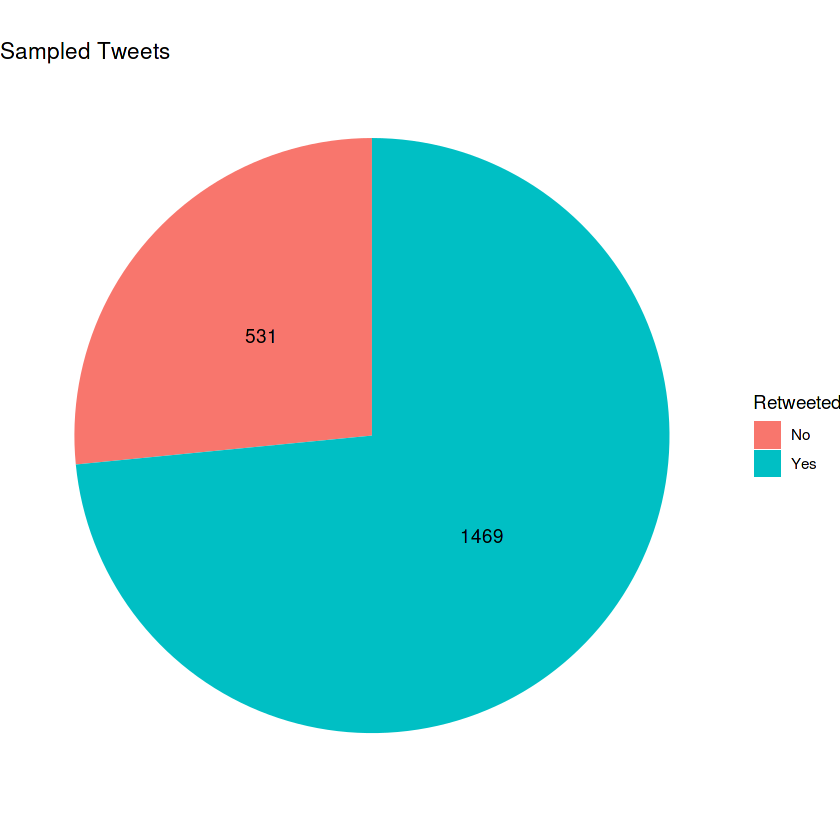

In [3]:
# Load required libraries
library(dplyr)
library(ggplot2)

# Group the sampled tweets
retweet_anal <- tweets_retweets %>% 
  group_by(is_retweet) %>% 
  count()

# Change the column values to make them more informative
retweet_anal$is_retweet[retweet_anal$is_retweet == 0] <- "No"
retweet_anal$is_retweet[retweet_anal$is_retweet == 1] <- "Yes"

# Plot the grouped data
ggplot(retweet_anal, aes(x="", y = n, fill = is_retweet)) +
  geom_col() +
  geom_text(aes(label = n), 
            position = position_stack(vjust = 0.5)) +
  coord_polar(theta = "y") +
  labs(fill = "Retweeted",
       title = "Sampled Tweets") +
  theme_void()

From the chart, we conclude that nearly three quarters of the sampled tweets were retweets.

We delve further to identify what was most retweeted.

In [4]:
# Top 5 retweeted
tweets_retweets %>% 
  distinct_all() %>% 
  arrange(-retweet_retweet_count) %>% 
  head(n = 5)

,is_retweet,retweet_retweet_count,retweet_screen_name,retweet_text,text
,<int>,<int>,<chr>,<chr>,<chr>
1,1,7117,kansaita_,yo de pequeña en una boda a las 4 de la mañana https://t.co/TIJJLPqQWo,RT @kansaita_: yo de pequeña en una boda a las 4 de la mañana https://t.co/TIJJLPqQWo
2,1,2107,FredMatiangi,I am shocked and disgusted by a viral video clip of a female motorist being molested by suspected boda boda riders along Wangari Maathai /Forest Road. We must protect our roads from such vile and reprehensible acts of aggression.,RT @FredMatiangi: I am shocked and disgusted by a viral video clip of a female motorist being molested by suspected boda boda riders along…
3,1,1367,NPSOfficial_KE,Our attention has been drawn to a distasteful video circulating on social media of Boda boda riders attacking a motorist after an alleged road traffic accident. The rowdy gang went ahead and stripped the lady off her clothes.,RT @NPSOfficial_KE: Our attention has been drawn to a distasteful video circulating on social media of Boda boda riders attacking a motoris…
4,1,1335,ImagenRetro,"Cecilia Amenábar y Gustavo Cerati el día de su boda, 1993. 💛 https://t.co/8ma4GUXT7K","RT @ImagenRetro: Cecilia Amenábar y Gustavo Cerati el día de su boda, 1993. 💛 https://t.co/8ma4GUXT7K"
5,1,1041,thisiskareh,"The incident has just triggered my worst experience with Boda riders, I was 7 months pregnant, when a boda guy hit my car from behind along Thika road, in less than a minute I had over 50 Boda guys surrounding my car, they blocked me, I couldn't move. This was at 6:45 ish jioni.","RT @thisiskareh: The incident has just triggered my worst experience with Boda riders, I was 7 months pregnant, when a boda guy hit my car…"


From the results of the query, the first and forth top retweeted are unrelated to the subject of our analysis. The other top retweets are:

> 2,107 retweets
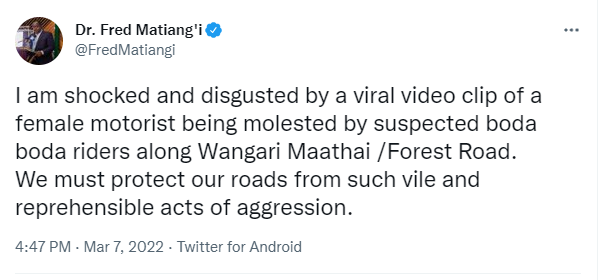

> 1367 retweets
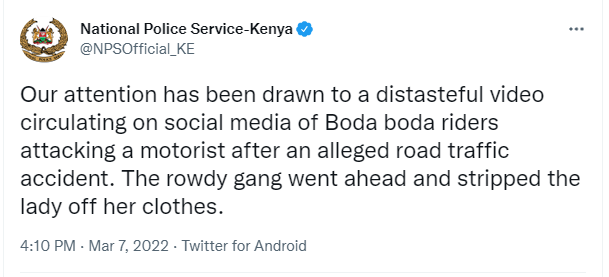

> 1041 retweets
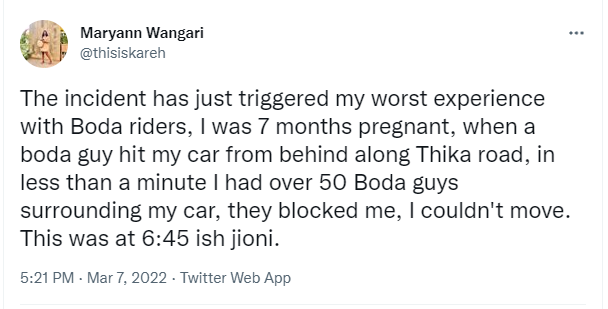

# Non-retweets Analysis

## Data Extraction

We shall start by extracting the non-retweeted tweets.

In [5]:
# Get non-retweets
non_retweeted <- tweets_retweets$text[tweets_retweets$is_retweet==0]
# View sample resultant data
head(non_retweeted)

[1] "@DCI_Kenya Sector totally out of control. No regard for law and order. Chaotic and unruly and part of crime. In most shootings you hear it was done by someone riding a motor bike. We need law and order in boda boda operations ! https://t.co/Z4IDCI6Si7"
[2] "@ntvkenya Boda Boda in the Nairobi CBD should be NYS Nairobi county employees\nhttps://t.co/r203Yk5p64"                                                                                                                                                     
[3] "@Kenyans What happened in Forest Road by Boda Boda was promoted by Sonko not Kidero\nhttps://t.co/LSoH95D5Op"                                                                                                                                               
[4] "Ujamaliza deni ya Valentine's, International women's Day ndo hiyo(kutoboka) unafika home uchill, kuingia online hivi dem wako amepost #allmenaretrash\nJuu ya ujinga ya wasee wa boda uko #forestroad."                                                     
[5] "Jayden orders crack down on all boda boda operators in Nairobi and across the country after the Forest road incident.\n\nNairobi CBD Charles Keter Forest Road Nduthi https://t.co/MH0OADf8Q5"                                                              
[6] "No se qué de una boda... https://t.co/eGrWzZG3Dm"

## Data Cleaning

Next, we shall clean the data such as removing URLs, and punctuation.

In [6]:
# Load required packages
library(stringr)

# Get rid of URLs
non_retweeted <- str_remove_all(non_retweeted, " ?(f|ht)(tp)(s?)(://)(.*)[.|/](.*)")
# Replace any newline characters with a space
non_retweeted <- str_replace_all(non_retweeted, "\\\n", " ")
# Remove mentions
non_retweeted <- str_remove_all(non_retweeted, "@[[:alnum:]_]{4,}")
# Remove any trailing whitespace around the text
non_retweeted <- str_trim(non_retweeted, "both")
# Remove punctuation
non_retweeted <- str_remove_all(non_retweeted, "[[:punct:]]")

# Store the cleaned data as a tibble
tidy_tweets <- tibble(line = 1:531, text = non_retweeted)
# View sample
head(tidy_tweets)

line,text
<int>,<chr>
1,Sector totally out of control No regard for law and order Chaotic and unruly and part of crime In most shootings you hear it was done by someone riding a motor bike We need law and order in boda boda operations
2,Boda Boda in the Nairobi CBD should be NYS Nairobi county employees
3,What happened in Forest Road by Boda Boda was promoted by Sonko not Kidero
4,Ujamaliza deni ya Valentines International womens Day ndo hiyokutoboka unafika home uchill kuingia online hivi dem wako amepost allmenaretrash Juu ya ujinga ya wasee wa boda uko forestroad
5,Jayden orders crack down on all boda boda operators in Nairobi and across the country after the Forest road incident Nairobi CBD Charles Keter Forest Road Nduthi
6,No se qué de una boda


## Data Tokenization

We turn the tweet strings into a list of individual tokens.

In [7]:
# Load required package
library(tidytext)

# Tokenization
tokenized_tweets <- tidy_tweets %>% 
  unnest_tokens(word, text)

## Analysis and Visualization

In this section, we identify the words that shaped the conversation and their sentiments.

In [8]:
# Remove stop words
cleaned_tweets <- tokenized_tweets %>% 
  anti_join(get_stopwords())

# Generate a list of the most common words
tweets_common_words <- cleaned_tweets %>% 
  count(word, sort = TRUE)

# View sample data
head(tweets_common_words, n = 10)

Joining, by = "word"



word,n
<chr>,<int>
boda,836
de,106
la,98
que,82
en,67
guys,63
riders,60
y,58
nairobi,56


From the generated list, we identify that the words of interest have a frequency of 60 and below. We shall therefore generate a word cloud that includes this filter.

Loading required package: RColorBrewer



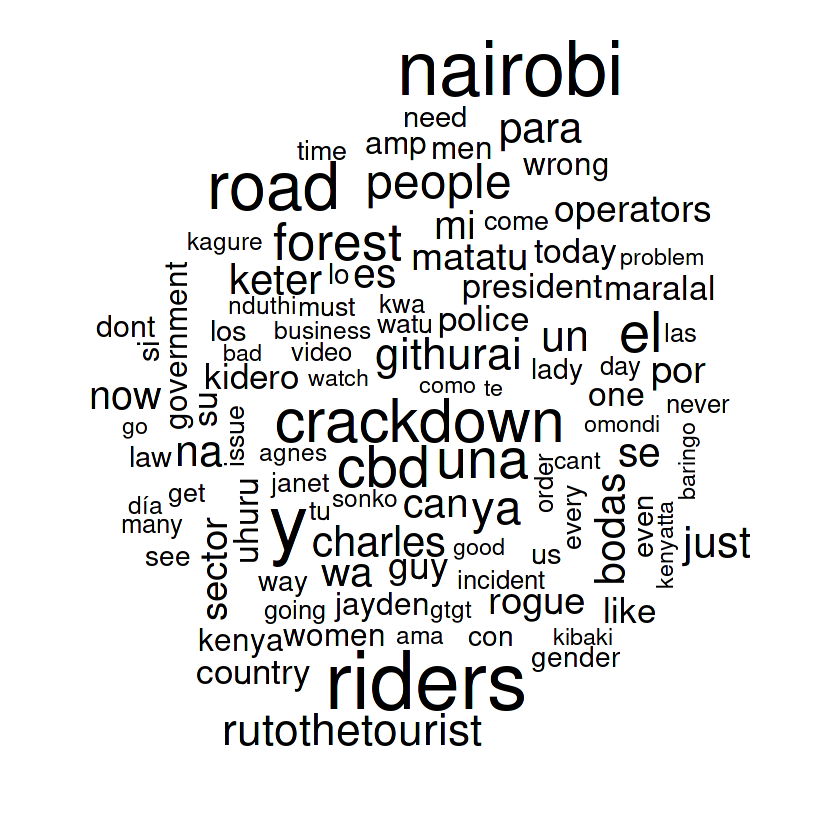

In [9]:
# Load required package
library(wordcloud)

# Generate the wordcloud
cleaned_tweets %>% 
  count(word) %>% 
  filter(n <= 60) %>% 
  with(wordcloud(word, n, max.words = 100))

From the wordcloud, we can conclude that the conversation was mainly centered on the crackdown in Nairobi, the government, including the top officials and the police, and gender.

### Sentiment Analysis

Using the Bing sentiment lexicon, we identify the most common positive and negative words used in the tweets. We shall then represent them visually using a word cloud and a graph.

In [10]:
# Get the bing lexicon
bing <- get_sentiments("bing")

# Categorize the tokenized tweets using bing lexicon
tweets_sentiments_bing <- cleaned_tweets %>% 
  inner_join(bing) %>% 
  count(word, sentiment, sort = TRUE)

# View sample resultant data
head(tweets_sentiments_bing, n=8)

Joining, by = "word"



word,sentiment,n
<chr>,<chr>,<int>
rogue,negative,24
like,positive,21
wrong,negative,18
issue,negative,14
bad,negative,11
good,positive,11
problem,negative,11
harassed,negative,9


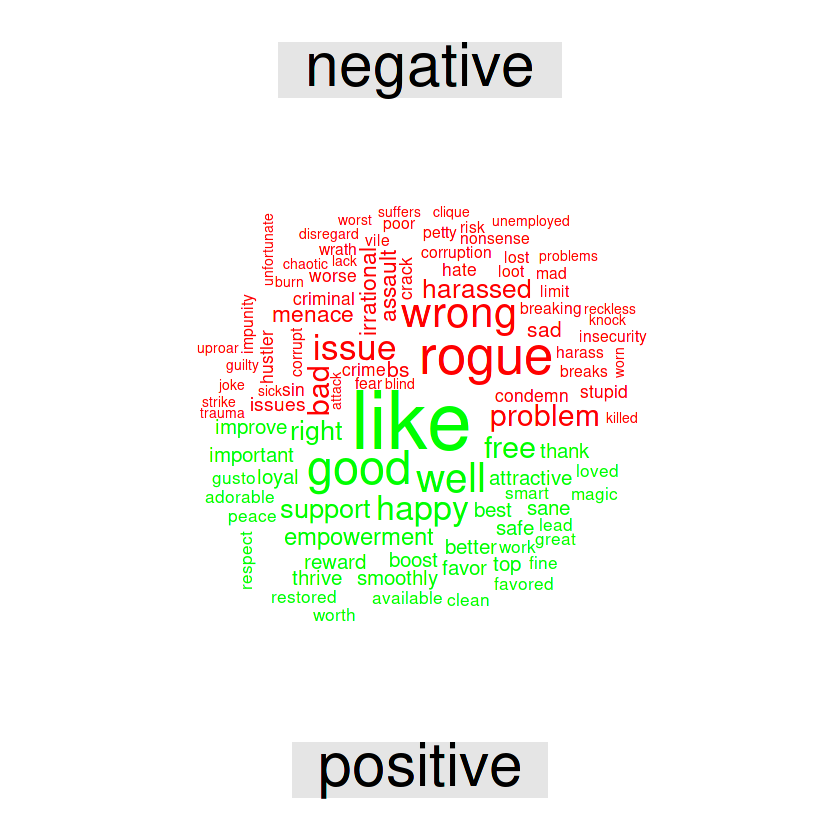

In [11]:
# Generate a wordcloud

# Load required packages
library(reshape2)

# The wordcloud
tweets_sentiments_bing %>% 
  acast(word ~ sentiment, value.var = "n", fill = 0) %>% 
  comparison.cloud(colors = c("red", "green"), max.words = 100)

The most common positive and negative words can be summarized in a bar graph as below.

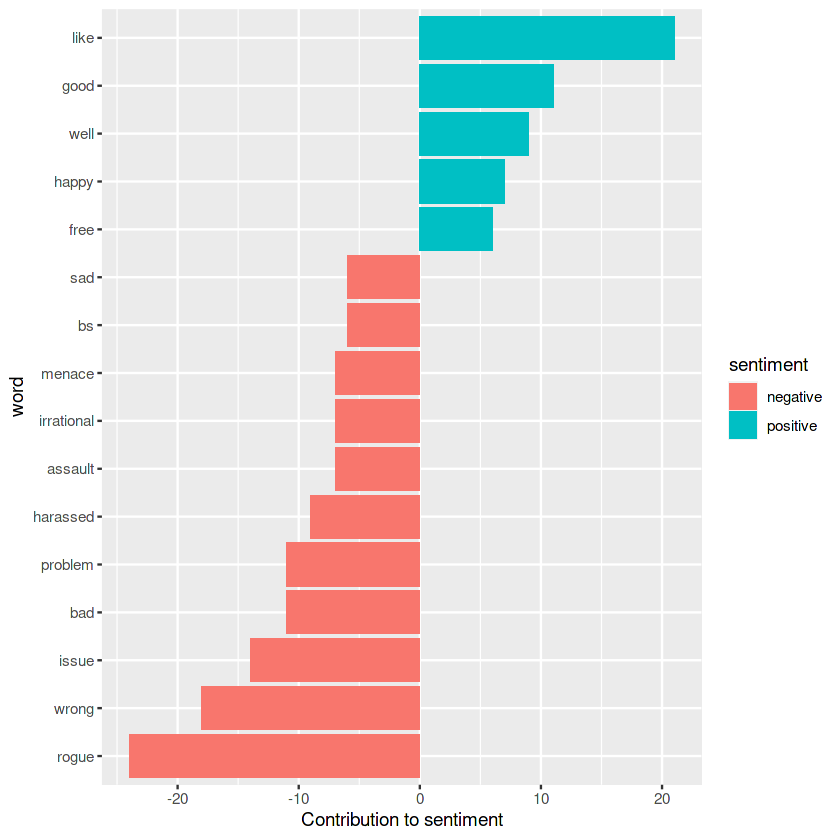

In [12]:
# The graph
tweets_sentiments_bing %>% 
  filter(n>5) %>% 
  mutate(n = ifelse(sentiment == "negative", -n, n)) %>% 
  mutate(word = reorder(word, n)) %>% 
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col() +
  coord_flip() +
  labs(y = "Contribution to sentiment")

# Conclusion

From the analysis, we identified that the conversation was mainly dominated by the opinions of a few (retweets). For those who gave their opinions (original tweets), their sentiments were mainly negative. We can therefore conclude that the Motorcyle Taxis (boda boda) industry is a menace and in dire need of reforms. 